# Aumento de los datos imagen utilizando Keras ImageDataGenerator

**Keras** es una biblioteca de software de código abierto que proporciona una interfaz de Python para las redes neuronales artificiales. Keras actúa como una interfaz para la biblioteca **TensorFlow**. Este artículo explora el uso de la clase **ImageDataGenertor** de Keras para aumentar las imágenes.

# ¿Qué es el aumento de imágenes (Image Augmentation)?

El aumento de la imagen es el proceso de ampliación de los datos de formación de la imagen, mediante el uso de transformaciones tales como rotaciones aleatorias, transformaciones de cizallamiento, cambios de zoom y giros, en los datos de imagen disponibles.

# ¿Dónde utilizamos el aumento de imágenes?

Utilizamos el aumento de imágenes cuando no tenemos suficientes datos de entrenamiento para entrenar nuestro modelo. En estas situaciones, podemos crear nuevas imágenes a partir de las existentes, aplicándoles transformaciones. Aunque estas imágenes sean similares, la CNN (red neuronal convolucional) las considera como imágenes completamente nuevas. Esto nos ayudará a crear un conjunto de datos de entrenamiento más amplio y, en consecuencia, permitirá que nuestro modelo converja de forma más eficiente.

# ¿Qué hace el aumento de imágenes?

Lo que hace específicamente el aumento de imágenes es que tomará una imagen y creará muchas versiones diferentes de esa misma imagen que están alteradas en la forma que usted haya especificado. Esto aumenta artificialmente el tamaño de los datos de entrenamiento y permite que el modelo se entrene en una diversidad de imágenes, lo que hace que sea menos probable que se sobreajuste en los datos de entrenamiento y más probable que generalice mejor en las características definitorias de cada clase. Ahora echaremos un vistazo a las opciones que nos da `ImageDataGenerator` y cómo visualizar cada una de esas transformaciones.

```python 
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None)
```

Nos centraremos en mostrar un puñado de estas características: 
- Rango de Rotación, 
- Rango de Desplazamiento de Anchura, 
- Rango de Desplazamiento de Altura, 
- Rango de Luminosidad, 
- Rango de Cizalladura, 
- Rango de Zoom y Volteo Horizontal y Vertical. 

La mayoría de estos son bastante intuitivos en términos de lo que significan, pero es una buena práctica para ser capaz de visualizar qué tipo de imágenes que se están inyectando en su modelo después de la ampliación. Para ver la documentación completa, visite la página de la API de [Keras](https://keras.io/api/preprocessing/image/).

# ¿Cómo empezar?
En primer lugar, para empezar, querrá importar los siguientes paquetes


In [6]:
import tensorflow as tf
# from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

A continuación, querrá establecer una ruta de acceso a una imagen dentro de su conjunto de datos.
Imaginate que estas clasificando imágenes de Araucaria en Neuquén.

In [56]:
image_path = 'Araucarias.jpg'

## Visualización de la imagen

Vamos a visualizar primero una imagen. Puedes hacerlo con el siguiente código. Incluiré también una imagen de la fotografía que voy a utilizar.

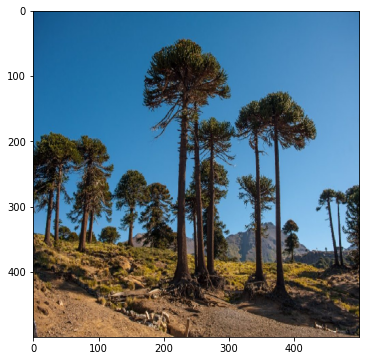

In [57]:
#Carga la imagen desde la ruta de imagen establecida
img = tf.keras.utils.load_img(image_path, 
                              target_size= (500,500))
img_tensor = tf.keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, 
                            axis=0)

#Permite visualizar adecuadamente nuestra imagen reescalando los valores en el array
img_tensor /= 255.

#Grafica la imagen
plt.figure(figsize=(6,6))
plt.imshow(img_tensor[0])
plt.show()

Genial, ahora vamos a explorar algunos aumentos, podemos empezar por voltear la imagen.

## Volteo horizontal y vertical (Horizontal & Vertical Flip)

In [58]:
# Carga el path de la imagen
img = tf.keras.utils.load_img(image_path, 
                              target_size= (500,500))
img_tensor = tf.keras.utils.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, 
                            axis=0)

# Usa ImageDataGenerator para voltear la imagen
datagen = ImageDataGenerator(horizontal_flip=True, 
                             vertical_flip=True)

# Vamos a usar esta función en todas las caracteristicas que vamos a ver
def flow_graph(datagen):
    # Crea nuestro lote de una imagen
    pic = datagen.flow(img_tensor, 
                       batch_size = 1)
    #Grafica las figuras
    plt.figure(figsize=(10,8))

    for i in range(1,3):
        plt.subplot(1, 2, i)
        batch = pic.next()
        image_ = batch[0].astype('uint8')
        plt.imshow(image_)
    return plt.show()

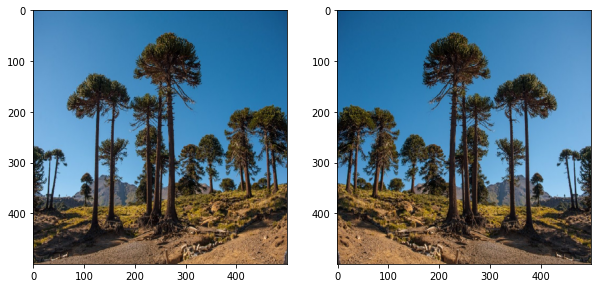

In [59]:
flow_graph(datagen)

Como puedes ver, estas transformaciones hacen exactamente lo que describen. Horizontal_flip y Vertical_flip volteará las imágenes a lo largo del eje correspondiente para producir una nueva imagen. Ahora que tenemos este código configurado, podemos visualizar otras transformaciones y cómo afectan a nuestras imágenes. Todo lo que tenemos que hacer es cambiar lo que está sucediendo dentro de ImageDataGenerator.

## Rango de desplazamiento de la anchura (Width Shift Range)
Aquí están las líneas de código que son diferentes, por lo demás, ejecutar todo lo demás lo mismo.

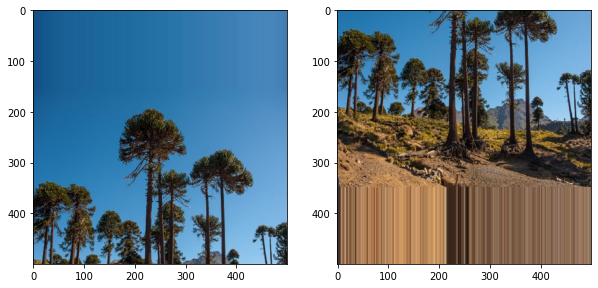

In [60]:
datagen = ImageDataGenerator(width_shift_range=[-150, 150])

flow_graph(datagen)

El rango de desplazamiento de anchura desplaza la imagen a lo largo del **eje x**. Esto desplazará partes de su imagen fuera del marco y tendrá diferentes partes ahora centradas. El espacio previamente ocupado por la imagen se llenará con el píxel más cercano por defecto. Esto también se puede cambiar, aunque yo prefiero mantenerlo.

## Rango de desplazamiento de altura (Height Shift Range)

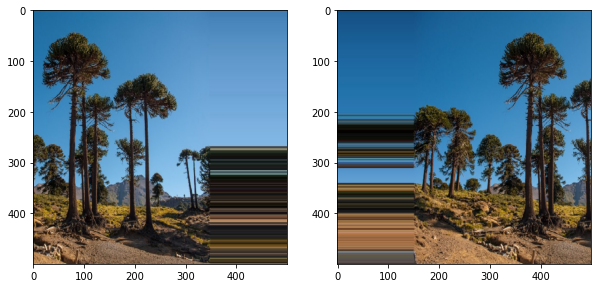

In [61]:
datagen = ImageDataGenerator(height_shift_range=[-150, 150])

flow_graph(datagen)

El rango de desplazamiento de altura desplaza la imagen a lo largo del **eje y**. Al igual que con el rango de desplazamiento de la anchura, los píxeles se rellenan de acuerdo con la lista de métodos de relleno, y por defecto por el más cercano. Tenga en cuenta que en ciertos ejemplos, querrá cambiar el modo de relleno ya que simplemente no tendría sentido para su imagen.

## Rango de rotación (Rotation Range)

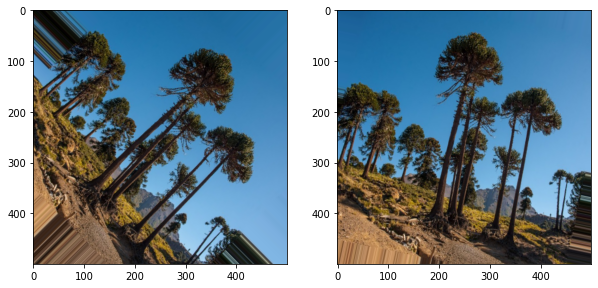

In [62]:
datagen = ImageDataGenerator(rotation_range=120)

flow_graph(datagen)

El rango de rotación rotará aleatoriamente su imagen dentro del rango que le haya dado. En el caso de que la imagen se rote y ciertas áreas queden sin píxeles, se rellenarán de acuerdo con su modo de relleno.

## Rango de brillo (Brightness Range)

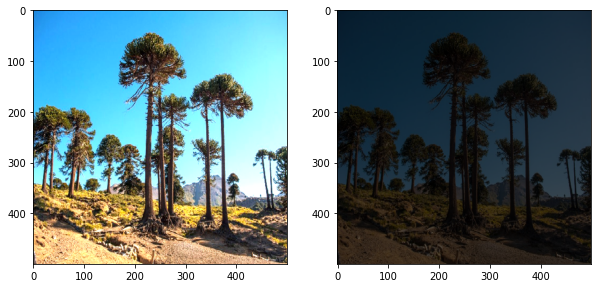

In [63]:
datagen = ImageDataGenerator(brightness_range=[0.1, 1.8])

flow_graph(datagen)

Esto aclarará u oscurecerá aleatoriamente una imagen dentro de un rango. Los valores inferiores a 1 oscurecerán la imagen, mientras que los valores superiores a 1 la aclararán. Un valor exactamente de 1 no afectará a la imagen. El flotador que seleccione representa el porcentaje de aclarado, por lo que un 0,1 significa un 10% de aclarado.

## Rango de zoom (Zoom Range)

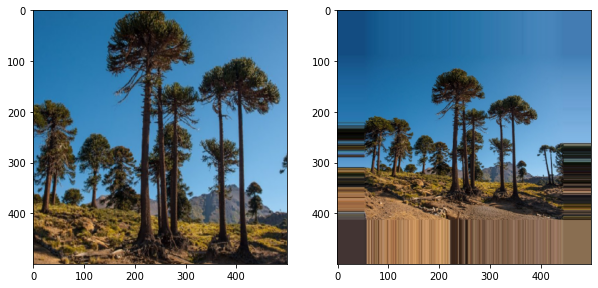

In [66]:
datagen = ImageDataGenerator(zoom_range=[0.1, 1.8])

flow_graph(datagen)

El zoom puede ser especificado como una matriz/tupla de flotadores o como un flotador singular. Cuando se especifica como una matriz como la de arriba, se seleccionará aleatoriamente una cantidad dentro del rango por el que se hará el zoom. Cuando se especifica como un flotador singular, creará un rango de ese valor igual a 1-valor, 1+valor. Así que, por ejemplo, si usted dijera 0,4, crearía un rango igual a [0,6, 1,4]. Lo que hace el zoom es algo poco intuitivo, para valores menores a 1 se acercará a la imagen y para valores mayores a 1 se alejará. Añade nuevos valores a la imagen o interpola sus valores dependiendo de si se está acercando o alejando.

## Rango de cizallamiento (Shear Range)

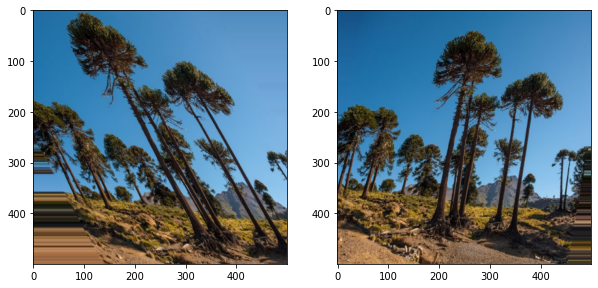

In [67]:
datagen = ImageDataGenerator(shear_range=60)

flow_graph(datagen)

El rango de cizallamiento desplaza la imagen en sentido contrario a las agujas del reloj en un rango de grados igual a la flotación elegida. Una forma de pensar en el cizallamiento, si se aplica a un cuadrado normal, convertiría el cuadrado en un paralelogramo. Distorsiona la imagen mediante el desplazamiento. Esto es muy útil en situaciones en las que su imagen no está totalmente orientada en la dirección que usted desea. Por ejemplo, si quisieras una imagen de frente pero la obtuvieras desde un ángulo, se puede utilizar el cizallamiento para generar el aspecto que tendría una imagen de frente.

## Cómo reunirlo todo ahora
Ahora que hemos cubierto algunas formas diferentes, combinemos estos métodos juntos y veamos qué tipos de imágenes somos capaces de producir.

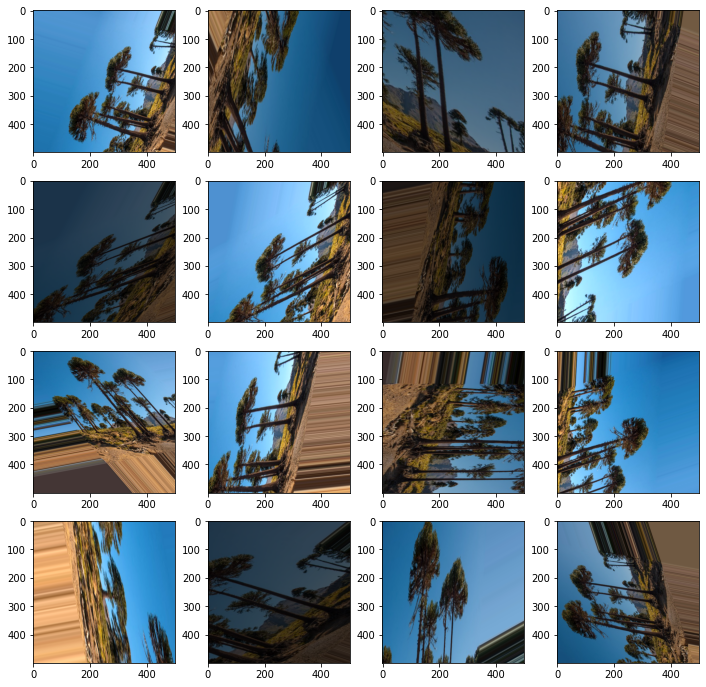

In [68]:
#Uses ImageDataGenerator to flip the images
datagen = ImageDataGenerator(width_shift_range=[-100, 100],          
                            height_shift_range=[-100, 100], 
                            rotation_range=120, 
                            brightness_range=[0.2, 1.5],
                            zoom_range = [0.3, 1.5],
                            shear_range=50)
#Creates our batch of one image
pic = datagen.flow(img_tensor, batch_size =1)

#Plots our figures
plt.figure(figsize=(12, 12))

for i in range(1,17):
    plt.subplot(4, 4, i)
    batch = pic.next()
    image_ = batch[0].astype('uint8')
    plt.imshow(image_)
plt.show()

Como puedes ver, algunas de estas imágenes parecen haber sido tomadas por un ávido participante del Club de Fotografía Mientras Corres. Aunque el aumento de datos puede ser muy útil, asegúrese de que los aumentos que está haciendo tienen sentido para su problema, y utilice lo que ha aprendido aquí para visualizar cómo pueden ser las imágenes que va a producir. Por ejemplo, ver si tiene sentido incluir la rotación, ya que la mayoría de las imágenes que puedas estar usando se encuentren en posición vertical.